# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in data science industry.
2. Use Python to explore a real live dataset on job postings.
3. For job seekers: Use these insights to help find the best job oppurtunities.

##  Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles ?
2. How are in demand skills trending for Data Engineers?
3. How well do jobs and skills pay for Data Engineers?
4. What is the most optimal skill to learn for Data Engineers? (high demand and high paying) 

## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

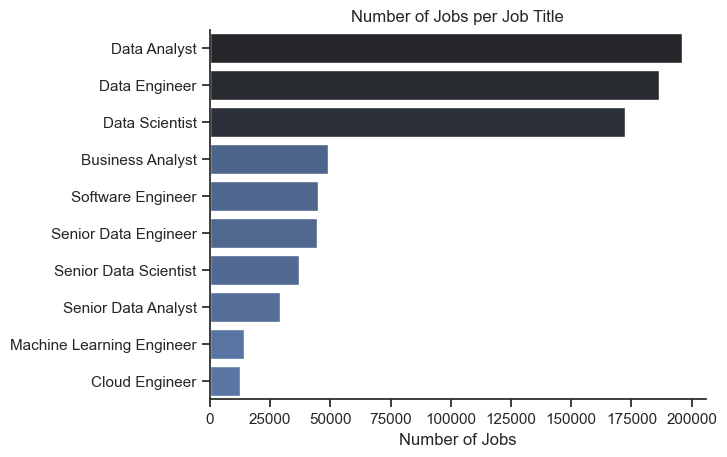

In [3]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='job_title_short',hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to Explore

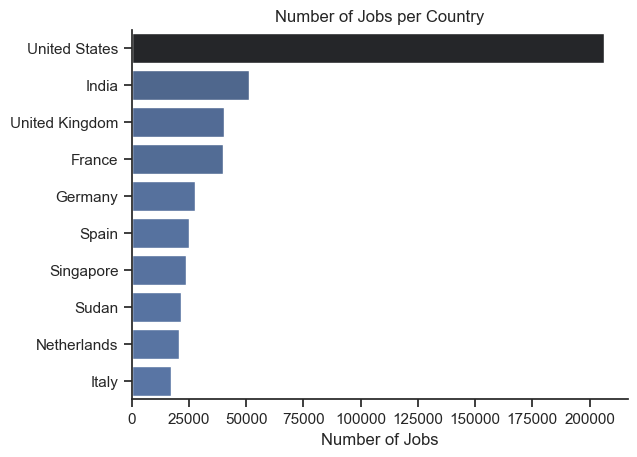

In [5]:
df_plot = df['job_country'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to Explore

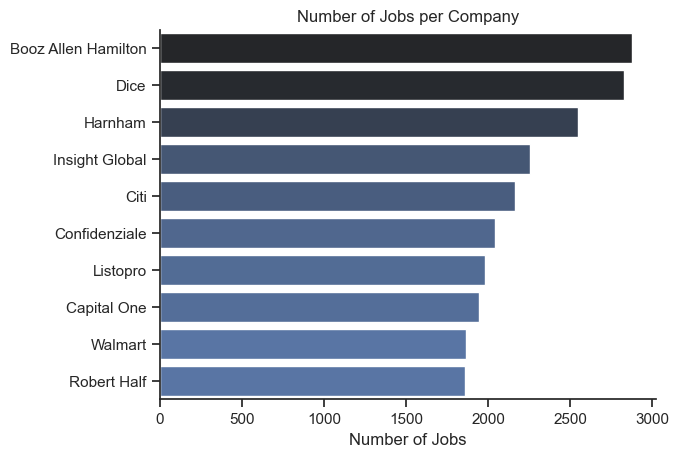

In [7]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name', hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Oppurtunities

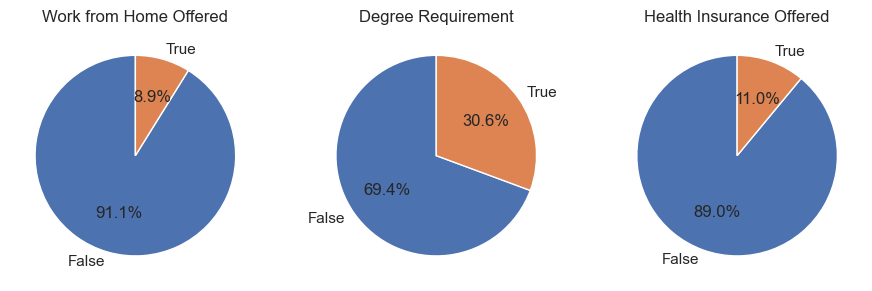

In [9]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize=(11, 3.5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

## Exploratory Data Analysis for Data Engineers in Germany

### Filter for Data Engineer roles in Germany

In [10]:
df_DE_GR = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Engineer')]

### Locations to Explore

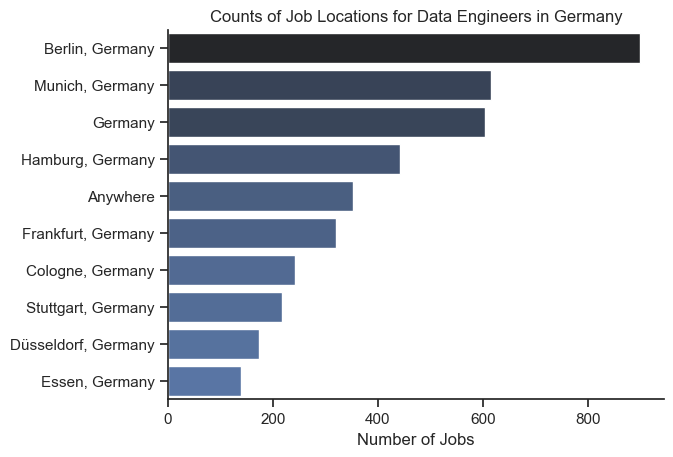

In [12]:
df_plot = df_DE_GR['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count',y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Engineers in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Oppurtinites

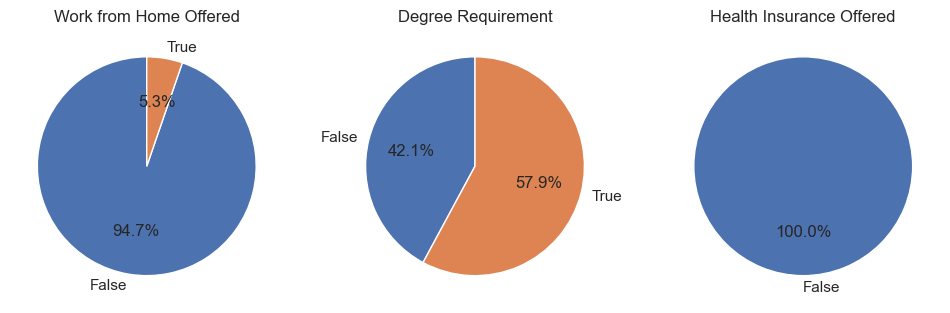

In [22]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DE_GR[column].value_counts().sort_index()
    
    ax[i].pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)

plt.show()


### Companies to Explore

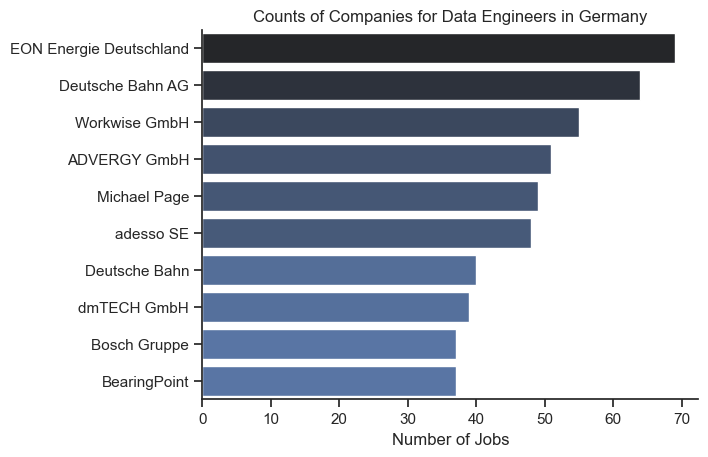

In [25]:
df_plot = df_DE_GR['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Engineers in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()